In [1]:
import pandas as pd
df = pd.read_csv('news_raw_3.csv')   
df= df.dropna(how='any')

In [2]:
target = df.loc[:,('target')]

In [3]:
import pickle
with open('onehot_result.pickle', 'rb') as fr:
    data = pickle.load(fr)

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.25)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(350,)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [6]:
from tensorflow import keras

In [7]:
chk_point_cb = keras.callbacks.ModelCheckpoint(
    filepath='./mymodel/checkpoint.{epoch:2d}.hdf5',
    save_weights_only= True,
    save_best_only= True,
    save_freq = 'epoch'
)

In [8]:
early_stop_cb = keras.callbacks.EarlyStopping(monitor='loss', patience = 4)

In [9]:
history = model.fit(train_input,
                    train_target,
                    epochs=300,
                    batch_size = 10,
                    validation_data=(test_input,test_target),
                    callbacks=[early_stop_cb, chk_point_cb],
                    verbose=0)

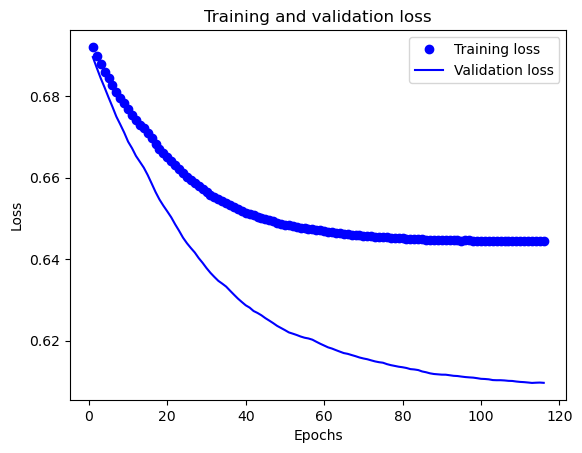

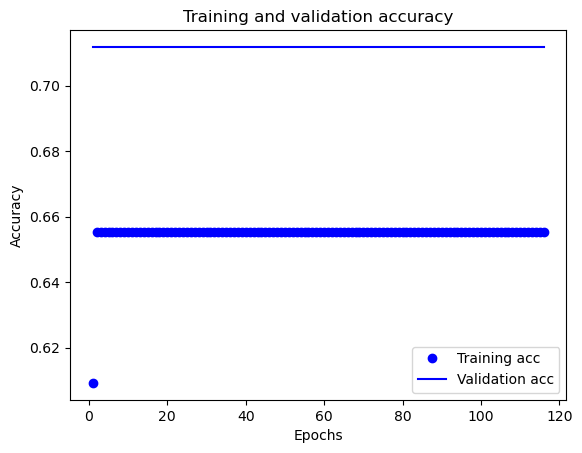

In [10]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim([0,1])
plt.legend()
plt.show()

plt.clf()   # 그래프를 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0,1])

plt.legend()
plt.show()

In [11]:
results = model.evaluate(test_input, test_target)

2/2 [==============================] - 0s 9ms/step - loss: 0.6097 - accuracy: 0.7119


In [12]:
model.predict(test_input[0:4]).flatten()

1/1 [==============================] - 0s 84ms/step


array([0.6481626, 0.6481626, 0.6481626, 0.6481626], dtype=float32)

In [13]:
test_target[0:4]

63     0
171    1
115    1
46     0
Name: target, dtype: int64